# Worksheet 24

Name:  Liang Han
UID: U86104920

### Topics

- Tuning Neural Networks

## Tuning Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

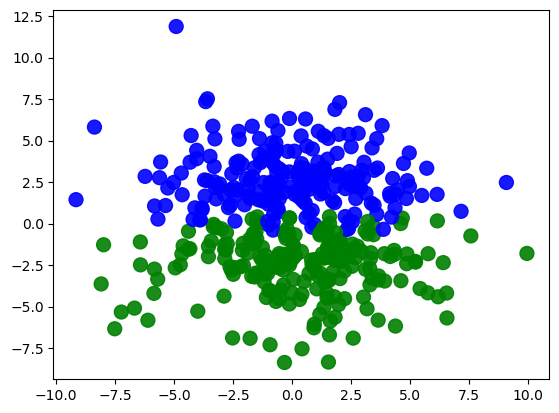

Epoch 1/800
9/9 [==============================] - 1s 4ms/step - loss: 3.5634
Epoch 2/800
9/9 [==============================] - 0s 3ms/step - loss: 3.0012
Epoch 3/800
9/9 [==============================] - 0s 3ms/step - loss: 2.5848
Epoch 4/800
9/9 [==============================] - 0s 3ms/step - loss: 2.0544
Epoch 5/800
9/9 [==============================] - 0s 3ms/step - loss: 0.6903
Epoch 6/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4945
Epoch 7/800
9/9 [==============================] - 0s 3ms/step - loss: 0.4260
Epoch 8/800
9/9 [==============================] - 0s 3ms/step - loss: 0.3679
Epoch 9/800
9/9 [==============================] - 0s 3ms/step - loss: 0.3226
Epoch 10/800
9/9 [==============================] - 0s 3ms/step - loss: 0.2809
Epoch 11/800
9/9 [==============================] - 0s 4ms/step - loss: 0.2477
Epoch 12/800
9/9 [==============================] - 0s 3ms/step - loss: 0.2198
Epoch 13/800
9/9 [==============================] - 0s 3ms/st

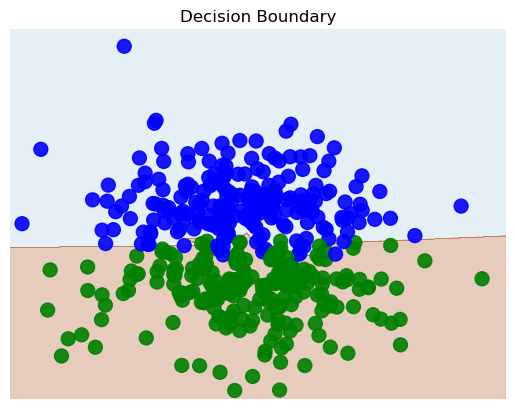

In [59]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=500, centers=centers, cluster_std=3,
                           random_state=1)

colors = np.array([x for x in 'bgrcmyk'])


# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x: m.cos(4 * x[0]) - x[1] < -.5 or m.cos(4 * x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4 * x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y


# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(10, input_dim=2, activation="relu"))
model.add(layers.Dense(8, input_dim=10, activation="relu"))
model.add(layers.Dense(6, input_dim=8, activation="relu"))
# model.add(layers.Dense(7, input_dim=40, activation="relu"))
# model.add(layers.Dense(6, input_dim=7, activation="relu"))
# model.add(layers.Dense(5, input_dim=6, activation="relu"))
# model.add(layers.Dense(4, input_dim=5, activation="relu"))
# model.add(layers.Dense(2, input_dim=4, activation="relu"))
model.add(layers.Dense(1, activation="tanh"))
model.compile(loss="binary_crossentropy")
X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=800)

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()